In [ ]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [ ]:
!mkdir ~/.kaggle
!cp /content/content/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%%time
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.95G/1.96G [01:30<00:00, 20.8MB/s]
100% 1.96G/1.96G [01:30<00:00, 23.3MB/s]
CPU times: user 998 ms, sys: 154 ms, total: 1.15 s
Wall time: 1min 31s


In [ ]:
!unzip /content/100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/WHITE TAILED TROPIC/120.jpg  
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]


In [ ]:
train_directory='/content/train'
test_directory='/content/test'
val_directory='/content/valid'

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
  # useful for getting number of classes
folders = glob('/content/train/*')
len(folders)

525

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode =  'categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [ ]:
print(len(training_set)) # number of batches
print(len(test_set))

2645
83


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=8,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-19-d9b505bb089a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/8
2645/2645 [==============================] - 1061s 401ms/step - loss: 6.2155 - accuracy: 0.3470 - val_loss: 3.9851 - val_accuracy: 0.5669
Epoch 2/8
2645/2645 [==============================] - 1053s 398ms/step - loss: 4.1684 - accuracy: 0.5527 - val_loss: 3.6132 - val_accuracy: 0.6446
Epoch 3/8
2645/2645 [==============================] - 1052s 398ms/step - loss: 3.4613 - accuracy: 0.6369 - val_loss: 3.7111 - val_accuracy: 0.6663
Epoch 4/8
2645/2645 [==============================] - 1054s 398ms/step - loss: 2.9443 - accuracy: 0.6926 - val_loss: 3.6246 - val_accuracy: 0.6891
Epoch 5/8
2645/2645 [==============================] - 1047s 396ms/step - loss: 2.6234 - accuracy: 0.7277 - val_loss: 3.6470 - val_accuracy: 0.7059
Epoch 6/8
2645/2645 [==============================] - 1043s 394ms/step - loss: 2.3005 - accuracy: 0.7597 - val_loss: 3.5900 - val_accuracy: 0.7120
Epoch 7/8
2645/2645 [==============================] - 1036s 392ms/step - loss: 2.0783 - accuracy: 0.7841 - val_

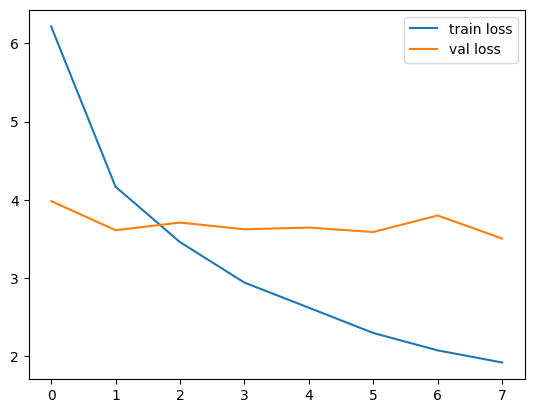

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

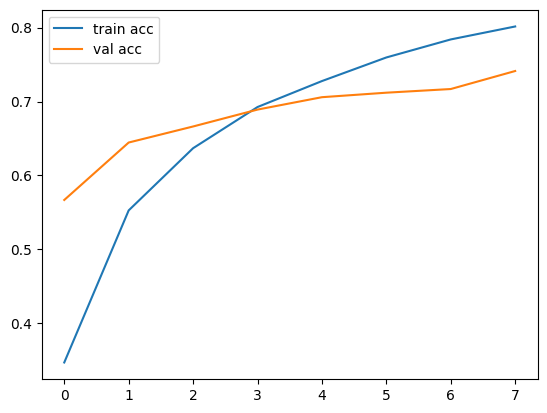

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('BC.h5')


In [ ]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array

model1 = load_model('/content/BC.h5',compile=False)  

In [ ]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 19ms/step


'AFRICAN CROWNED CRANE'

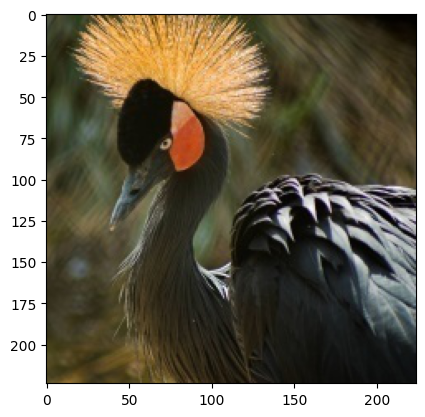

In [ ]:
img='/content/valid/AFRICAN CROWNED CRANE/1.jpg'
pic=load_img('/content/valid/AFRICAN CROWNED CRANE/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [ ]:
from google.colab import files

model_path = '/content/BC.h5' # replace with the path to your h5 model file
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>